# K-Medias para agrupamiento de tipos de sonido

In [ ]:
from sklearn.metrics import silhouette_score,silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import librosa as lb
import os
import tqdm

from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'yellowbrick'

Extrayendo características de los audios...


 87%|████████▋ | 94/108 [00:01<00:00, 68.64it/s] E:\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=498
  warnings.warn(
100%|██████████| 108/108 [00:01<00:00, 77.18it/s]


Extracción completada. Datos procesados: (108, 64)

Porcentaje de varianza explicada por cada componente:
[3.7232475e+01 1.4358492e+01 1.0147717e+01 5.8028975e+00 4.4719090e+00
 3.6919289e+00 3.3585351e+00 2.0463002e+00 1.9793483e+00 1.6585439e+00
 1.5482675e+00 1.3996155e+00 1.2673035e+00 1.2077143e+00 1.0687095e+00
 9.1123980e-01 7.8486431e-01 7.2478449e-01 6.8346089e-01 5.9030002e-01
 5.2062851e-01 4.8781168e-01 4.1353661e-01 3.6275411e-01 3.5285082e-01
 3.4057865e-01 2.9583666e-01 2.8099105e-01 2.4867566e-01 2.1296053e-01
 1.9535016e-01 1.6262102e-01 1.4062047e-01 1.3248166e-01 1.1266343e-01
 1.0768442e-01 9.7479045e-02 8.3041139e-02 6.1303679e-02 5.8361091e-02
 4.8696462e-02 4.4973150e-02 4.0905051e-02 3.8645599e-02 3.6629565e-02
 2.7997462e-02 2.4848761e-02 2.0488566e-02 1.9660270e-02 1.8241001e-02
 1.3602698e-02 1.2037068e-02 1.1348250e-02 1.0410973e-02 7.2195632e-03
 5.0319610e-03 4.2817136e-03 3.4555881e-03 2.9403297e-03 2.4752759e-03
 1.2644336e-03 1.2145520e-03 6.5455050e-04

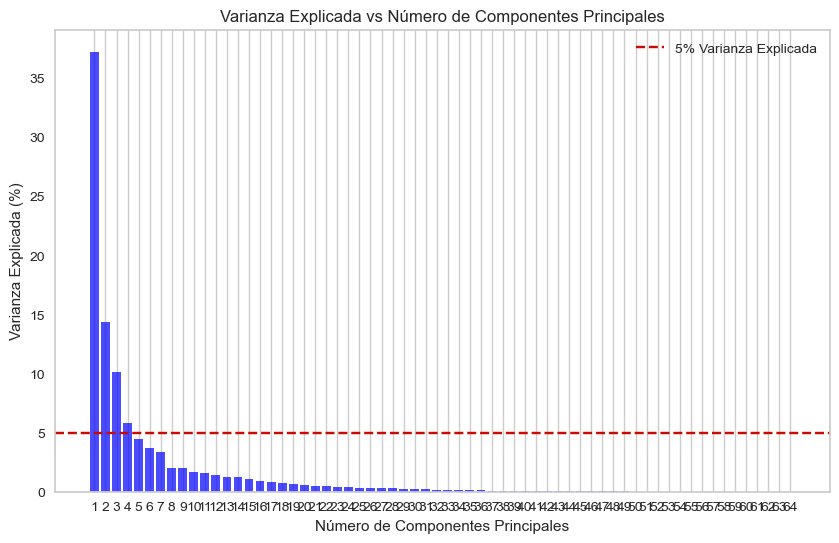

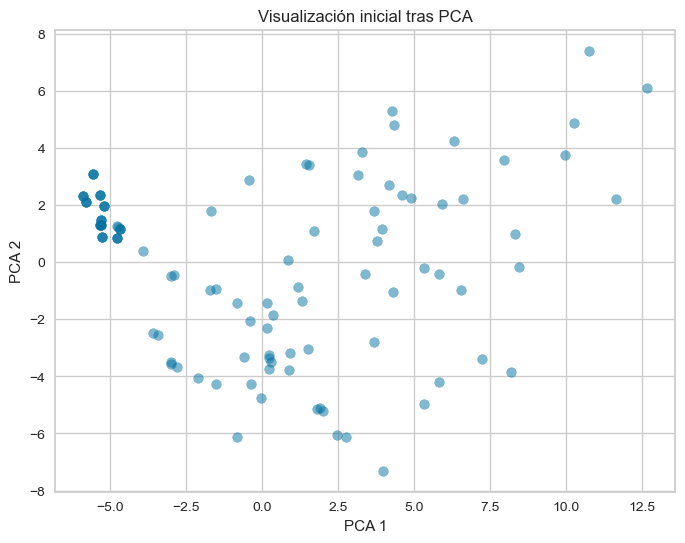

Calculando el método del codo...


E:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

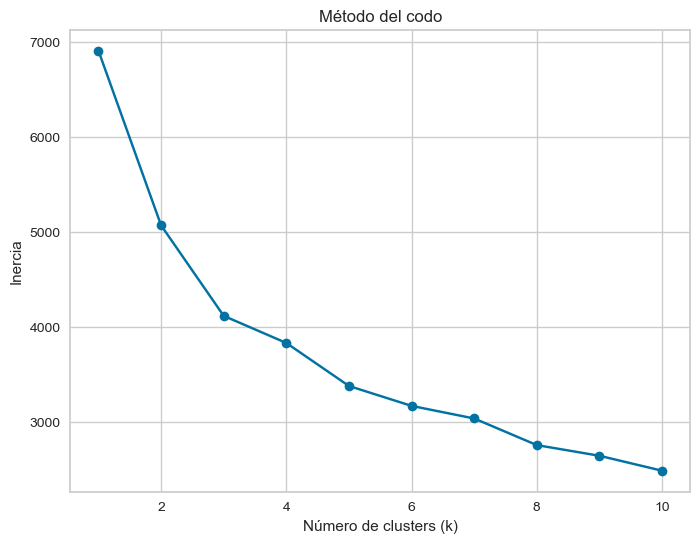

Calculando el coeficiente de Silhouette para cada k...


E:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

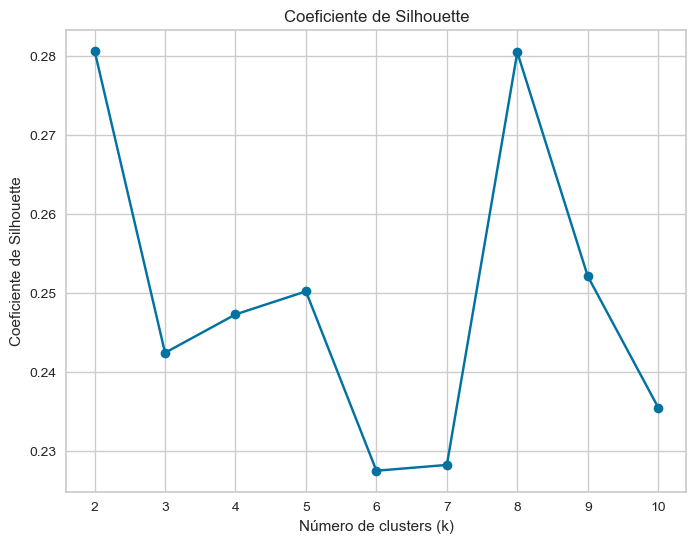

Aplicando K-Means con k=5...


E:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


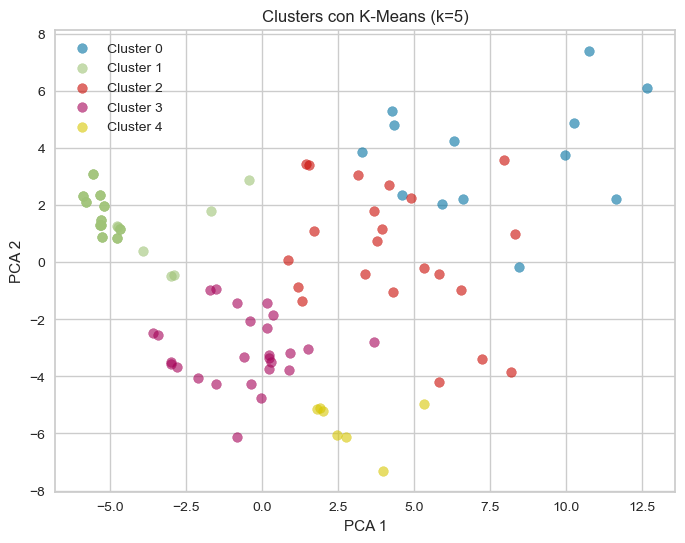

Escuchando muestras representativas de cada cluster con k=5...
Cluster 0: Archivo representativo - 17.wav
Cluster 1: Archivo representativo - 100.wav
Cluster 2: Archivo representativo - 1.wav
Cluster 3: Archivo representativo - 10.wav
Cluster 4: Archivo representativo - 65.wav
Lista de audios clasificados en cada cluster con k=5:
Cluster 0: ['17.wav', '19.wav', '23.wav', '24.wav', '29.wav', '34.wav', '37.wav', '38.wav', '39.wav', '45.wav', '46.wav', '48.wav', '54.wav']
Cluster 1: ['100.wav', '101.wav', '102.wav', '103.wav', '104.wav', '105.wav', '106.wav', '107.wav', '108.wav', '20.wav', '22.wav', '27.wav', '30.wav', '33.wav', '74.wav', '75.wav', '76.wav', '77.wav', '78.wav', '79.wav', '80.wav', '81.wav', '82.wav', '83.wav', '84.wav', '85.wav', '86.wav', '87.wav', '88.wav', '89.wav', '90.wav', '91.wav', '92.wav', '93.wav', '94.wav', '95.wav', '96.wav', '97.wav', '98.wav', '99.wav']
Cluster 2: ['1.wav', '14.wav', '15.wav', '16.wav', '18.wav', '2.wav', '21.wav', '25.wav', '26.wav', '28.w

In [ ]:
# Especifica el camino a tu directorio de ficheros wav aquí
data_folder = "./datos/"
files = os.listdir(data_folder)

# Cargamos los datos y extraemos características
print("Extrayendo características de los audios...")
datos = []

for name in tqdm.tqdm(files):
    audio, sr = lb.load(data_folder + name, sr=16000, mono=True)  # Cargamos audio
    audio = lb.util.normalize(audio)  # Normalizamos amplitud

    # Calculamos la Transformada de Fourier (STFT)
    X = np.abs(lb.stft(audio, n_fft=2048, hop_length=256, win_length=2048,
                       window='hamming', center=True))

    # Calculamos el espectrograma Mel
    mel = lb.feature.melspectrogram(sr=16000, S=X, n_fft=2048, hop_length=256, power=1.0,
                                     n_mels=64, fmin=0, fmax=8000, htk=True, norm=None)

    # Calculamos el promedio de las frecuencias y normalizamos
    features = np.mean(mel, axis=1)
    features = features / features.max()

    datos.append(features)

# Convertimos la lista a un array numpy para procesamiento
datos = np.array(datos)
print(f"Extracción completada. Datos procesados: {datos.shape}")

# Estandarizamos los datos
scaler = StandardScaler()
datos_scaled = scaler.fit_transform(datos)

#varianza explicada
model_pca = PCA(n_components=64)
model_pca.fit(datos_scaled)

varianza_explicada = model_pca.explained_variance_ratio_ * 100
print("\nPorcentaje de varianza explicada por cada componente:")
print(varianza_explicada)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(varianza_explicada) + 1), varianza_explicada, alpha=0.7, color='blue')
plt.title('Varianza Explicada vs Número de Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada (%)')
plt.grid(axis='y')
plt.xticks(range(1, len(varianza_explicada) + 1))
plt.axhline(y=5, color='r', linestyle='--', label='5% Varianza Explicada')
plt.legend()
plt.show()

# Aplicamos reducción de dimensionalidad con PCA para visualización
pca = PCA(n_components=4)
datos_pca = pca.fit_transform(datos_scaled)

# Visualización preliminar
plt.figure(figsize=(8, 6))
plt.scatter(datos_pca[:, 0], datos_pca[:, 1], alpha=0.5)
plt.title("Visualización inicial tras PCA")
plt.show()

# Determinamos el número óptimo de clusters usando el método del codo
print("Calculando el método del codo...")
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(datos_scaled)
    inertia.append(kmeans.inertia_)

# Graficamos el método del codo
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title("Método del codo")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")
plt.show()

# Evaluamos la calidad del agrupamiento con el coeficiente de Silhouette
print("Calculando el coeficiente de Silhouette para cada k...")
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(datos_scaled)
    score = silhouette_score(datos_scaled, labels)
    silhouette_scores.append(score)

# Graficamos los coeficientes de Silhouette
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Coeficiente de Silhouette")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Coeficiente de Silhouette")
plt.show()





# Aplicamos K-Means con 5 clusters
print("Aplicando K-Means con k=5...")
kmeans_5 = KMeans(n_clusters=5, random_state=42)
labels_5 = kmeans_5.fit_predict(datos_scaled)

# Visualizamos los resultados tras agrupamiento con 5 clusters
plt.figure(figsize=(8, 6))
for i in range(5):
    plt.scatter(datos_pca[labels_5 == i, 0], datos_pca[labels_5 == i, 1], label=f"Cluster {i}", alpha=0.6)
plt.title("Clusters con K-Means (k=5)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

# Escuchamos algunos audios representativos de cada cluster con 5 clusters
print("Escuchando muestras representativas de cada cluster con k=5...")
representative_audios_5 = []

for cluster_id in range(5):
    indices = np.where(labels_5 == cluster_id)[0]
    representative_audios_5.append(indices[0])  # Tomamos el primer índice de cada cluster
    print(f"Cluster {cluster_id}: Archivo representativo - {files[indices[0]]}")

# Mostramos todos los audios clasificados por cluster con 5 clusters
print("Lista de audios clasificados en cada cluster con k=5:")
clustered_audios_5 = {cluster_id: [] for cluster_id in range(5)}

for cluster_id in range(5):
    indices = np.where(labels_5 == cluster_id)[0]
    clustered_audios_5[cluster_id] = [files[idx] for idx in indices]
    print(f"Cluster {cluster_id}: {clustered_audios_5[cluster_id]}")




# Informe

## Descripción de datos

<p>Contamos con un conjunto de datos compuesto por <strong>108 audios</strong>, cada uno representado por un vector de <strong>64 dimensiones</strong>. Estas dimensiones se extrajeron utilizando el <strong>espectrograma de Mel</strong>, una representación en el dominio de la frecuencia de las señales de entrada.</p>


<p>Para reducir la dimensionalidad y permitir una mejor visualización, empleamos <strong>PCA (Análisis de Componentes Principales)</strong>. Calculamos la varianza explicada por cada componente principal, como se observa en la Figura 1.</p>

## Tareas que se han llevado a cabo
<p><strong>1. Reducción de dimensionalidad y varianza explicada:</strong> En primer lugar, la reducción de dimensionalidad mediante <strong>PCA</strong> fue crucial para facilitar la visualización y el posterior análisis del agrupamiento. Tras calcular la varianza explicada, se observó que las primeras cuatro componentes principales capturan más del 90% de la variabilidad de los datos. Esto indica que estas componentes contienen la mayoría de la información relevante sobre los audios, permitiendo que el espacio reducido sea representativo para el análisis.</p>

<p><strong>2. Selección del número óptimo de clusters con el método del codo:</strong> Utilizando el <strong>método del codo</strong>, determinamos que el número óptimo de clusters es 5. Este valor de <em>k</em> fue elegido observando el punto en el que la inercia dejó de disminuir de manera significativa al aumentar <em>k</em>, lo que indica que a partir de ese número de clusters, la mejora en el agrupamiento se vuelve marginal.</p>

<p><strong>3. Evaluación de la calidad del agrupamiento con el coeficiente de Silhouette:</strong> El <strong>coeficiente de Silhouette</strong> se utilizó para evaluar la calidad del agrupamiento obtenido con <em>k=5</em>. Un coeficiente cercano a 1 indica que los puntos dentro de un cluster están bien agrupados, mientras que valores cercanos a 0 indican que algunos puntos podrían estar mal asignados. Los resultados indicaron que el coeficiente de Silhouette es relativamente alto para <em>k=5</em>, lo que respalda que este número de clusters es adecuado y que los agrupamientos son coherentes.</p>

<p><strong>4. Validación a través de audios representativos:</strong> Después de realizar el agrupamiento con <strong>K-Means</strong> y obtener los clusters, procedimos a escuchar algunos de los audios representativos de cada grupo. Esto nos permitió validar empíricamente los resultados. Los audios de cada cluster presentan características sonoras similares, lo que respalda la efectividad del agrupamiento. Es relevante señalar que, en algunos casos, los clusters 3 y 4 contienen sonidos similares, como sirenas de policía o ambulancias, pero con variaciones en la tonalidad o en la duración del sonido, lo que justifica la separación en dos grupos distintos.</p>

<p><strong>5. Interpretación de los clusters:</strong> Los clusters obtenidos no solo agrupan los audios de manera coherente, sino que también reflejan patrones en los tipos de sonidos. Al escuchar los audios representativos, es posible inferir que cada cluster corresponde a un tipo específico de sonido, como sonidos urbanos (sirenas), sonidos naturales (lluvia, viento), sonidos de animales, y otros. Aunque no se dispone de etiquetas explícitas en el dataset, la agrupación tiene sentido en términos de las características acústicas de los audios.</p>

## Resultados

### Visualización Inicial
<p>Tras aplicar <strong>PCA</strong> con 4 componentes principales, visualizamos los datos en un espacio de menor dimensionalidad.
    El grafico no muestra un división clara de los clusters, necesitamos calcular diferntes metricas para poder elegir un numero K óptimo.
    La Figura 2 muestra esta representación preliminar.</p>

### Método del Codo
<p>Utilizamos el <strong>método del codo</strong> para determinar el número óptimo de clusters. La Figura 3 muestra la inercia para diferentes valores de <em>k</em>.</p>

### Coeficiente de Silhouette
<p>Evaluamos la calidad del agrupamiento utilizando el <strong>coeficiente de Silhouette</strong>. La Figura 4 ilustra los resultados.</p>


### K-Means con k=5
<p>Aplicamos <strong>K-Means</strong> con <em>k=5</em>, obteniendo los siguientes clusters. En la Figura 5 mostramos la distribución de los datos agrupados.</p>


<p>Escuchamos audios representativos de cada cluster para validar los resultados:</p>
<ul>
  <li><strong>Cluster 0:</strong> Archivo representativo: audio_17.wav</li>
  <li><strong>Cluster 1:</strong> Archivo representativo: audio_100.wav</li>
  <li><strong>Cluster 2:</strong> Archivo representativo: audio_1.wav</li>
  <li><strong>Cluster 3:</strong> Archivo representativo: audio_10.wav</li>
  <li><strong>Cluster 4:</strong> Archivo representativo: audio_65.wav</li>
</ul>

## Conclusiones

<ol>
  <li>La varianza explicada indica que <strong>las primeras 4 componentes principales</strong> contienen la mayor parte de la información relevante.</li>
  <li>El método del codo sugiere que <strong>k=5</strong> es un buen valor para el número de clusters.</li>
  <li>El coeficiente de Silhouette respalda la calidad del agrupamiento con esta configuración.</li>
  <li>Los clusters obtenidos agrupan los audios de manera coherente, con similitudes en sus sonidos.</li>
  <li>Se puede apreciar cierta similitud entre los audios del cluster 3 y 4 ya que en ambos se aprecian sirenas de policia o ambulancias, pero su sonido no es exactamente el mismo</li>
</ol>
